# 4 Time Series Models
The goal of the LRM of the previous Chapter is to relate the variation (over time or in the cross-section) of variable  $Y$ with that of an explanatory variable  $X$. 

Time series models assume that the independent variable  $X$ is represented by past values of the dependent variable $Y$ . We typically denote by  $Y_t$ the value of a variable in time period  $t$ (e.g., days, weeks, and months) and  $Y_{t−1}$ refers to the value of the variable in the previous time period relative to today (i.e.,  $t$). More generally,  $Y_{t−k}$ (for  $k \ge 1$) indicates the value of the variable  $k$ periods before $t$. The notation $\Delta Y_t$ refers to the one-period change in the variable, that is, $\Delta Y_t=Y_t−Y_{t−1}$ while  $\Delta^{k} Y_t=Y_t−Y_{t−k}$ represents the change over  $k$ periods of the variable. **The aim of time series models can be stated as follows: is there useful information in the current and past values of a variable to predict its future?**

## 4.1  The Auto-Correlation Function (ACF)

A first exploratory tool that is used in time series analysis is the Auto-Correlation Function (ACF) that represents the correlation coefficient between the variable $Y_t$ and its lagged value $Y_{t-k}$  (hence the Auto part). We denote the sample correlation coefficient at lag $k$ by $\hat {\rho}_k $ that is calculated as follows:
$$
\hat{\rho}_k = \frac{\sum_{t=1}^{T} (Y_t - \bar{Y})(Y_{t-k} - \bar{Y}) / T}{\hat{\sigma}_Y^2}
$$

where  $\bar{Y}$ and $\hat{\sigma}_Y^2$ denote the sample mean and variance of $Y_t$. The auto-correlation is bounded between $\pm 1 $ with positive values indicating that values of $Y_{t-k}$ above/below the mean $\mu_Y$ are more likely to be associated with values of $Y_t$ above/below the mean. In this sense, positive correlation means that the variable has some persistence in its fluctuations around the mean. On the other hand, negative values represent a situation in which the variable is more likely to reverse its past behavior. The ACF is called a function because $\hat {\rho}_k$ is typically calculated for many values of $k$.

The Python function to calculate the ACF is `acf()` from `statsmodels.tsa.stattools`, and the package also provide a ready-made function to plot the ACF as `plot_acf()` from `statsmodels.graphics.tsaplots`

In the example below, we apply it to the monthly returns of the S&P 500 Index from January 1990 until May 2017.

The function provides a graph with the horizontal axis representing the lag  $k$ (starting at 0 and expressed as a fraction of a year) and the vertical axis representing the value of  $ \hat {\rho} ^k$. The horizontal dashed lines are equal to  $\frac{\pm 1.96}{\sqrt{T}} $ and represent the confidence interval for the null hypothesis that the autocorrelation is equal to 0. If the auto-correlation at lag  $k$ is within the interval we conclude that we fail to reject the null that the auto-correlation coefficient is equal to zero (at 5% level). 

[*********************100%***********************]  1 of 1 completed


<Figure size 720x432 with 0 Axes>

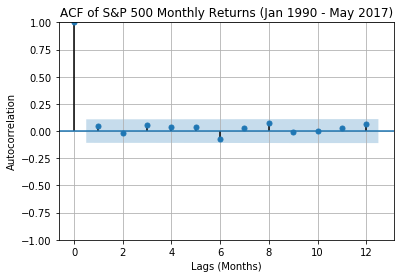

In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Download S&P 500 data from Yahoo Finance
sp500 = yf.download('^GSPC', start='1990-01-01', end='2017-05-31', interval='1mo')
sp500.columns = sp500.columns.droplevel(1)
# Calculate monthly returns
sp500['Monthly_Return'] = sp500['Close'].pct_change()

# Drop the first row with NaN value
sp500 = sp500.dropna()

# Plot the ACF of monthly returns
plt.figure(figsize=(10, 6))
plot_acf(sp500['Monthly_Return'], lags=12)
plt.title('ACF of S&P 500 Monthly Returns (Jan 1990 - May 2017)')
plt.xlabel('Lags (Months)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

The following code demonstrates how to generate an improved ACF graph.

ACF Values:
 [ 1.00000000e+00  4.27427948e-02 -1.59124356e-02  5.51546814e-02
  3.57972557e-02  4.02117196e-02 -7.18190133e-02  2.50345622e-02
  7.25745364e-02 -8.13548257e-03 -7.43077218e-04  2.94928283e-02
  6.61739243e-02]


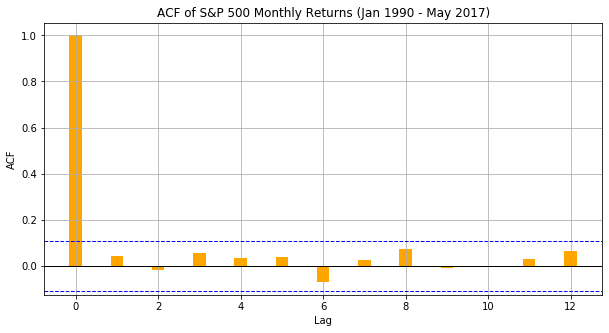

In [37]:
# Compute ACF values and confidence intervals
# acf_values: An array of autocorrelation values for each lag.
# confint: A 2D array with lower and upper confidence intervals for each lag.
acf_values, confint = acf(sp500['Monthly_Return'], nlags=12, alpha=0.05)

# Print ACF values
print("ACF Values:\n", acf_values)

# Plot ACF
plt.figure(figsize=(10, 5))
lags = np.arange(len(acf_values))
plt.bar(lags, acf_values, width=0.3, color='orange', label='ACF')

# Add confidence interval lines
conf_bound = 1.96 / np.sqrt(len(sp500['Monthly_Return']))
plt.axhline(y=conf_bound, linestyle='dashed', color='blue', linewidth=1)
plt.axhline(y=-conf_bound, linestyle='dashed', color='blue', linewidth=1)
plt.axhline(y=0, color='black', linewidth=1)  # Zero line

plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("ACF of S&P 500 Monthly Returns (Jan 1990 - May 2017)")
plt.grid(True)
plt.show()

The analysis of monthly returns for the S\&P 500 Index using Python shows that the auto-correlations are quite small, and non of them statistically different from zero at the 5% level. The ACF results indicate that there is very weak dependence in monthly returns, meaning that lagged values may not be very useful for forecasting future returns. The conclusion remains similar when considering the daily frequency.

In [70]:
def plot_acf_custom(returns, nlags=25):
    """
    Plots the Auto-Correlation Function (ACF) for a given time series.

    Parameters:
    returns (array-like): The time series data (e.g., daily or monthly returns).
    nlags (int): The number of lags to include in the ACF plot (default is 25).

    Returns:
    None (displays the ACF plot)
    """
    # Compute ACF values and confidence intervals
    acf_values, confint = acf(returns, nlags=nlags, alpha=0.05)

    # Exclude lag 0
    acf_values = acf_values[1:]  # Skip the first value (lag 0)
    confint = confint[1:]  # Skip the first confidence interval
    lags = np.arange(1, len(acf_values) + 1)  # Adjust lags to start from 1

    # Plot ACF
    plt.figure(figsize=(14, 5))
    plt.bar(lags, acf_values, width=0.3, color='orange', label='ACF')

    # Add confidence interval lines
    conf_bound = 1.96 / np.sqrt(len(returns))
    plt.axhline(y=conf_bound, linestyle='dashed', color='blue', linewidth=1)
    plt.axhline(y=-conf_bound, linestyle='dashed', color='blue', linewidth=1)
    plt.axhline(y=0, color='black', linewidth=1)  # Zero line

    plt.xlabel("Lag")
    plt.ylabel("ACF")
    plt.title("ACF Plot of Returns")
    plt.grid(True)
    plt.legend()
    plt.show()

In [113]:
# Download S&P 500 data from Yahoo Finance
sp500_daily = yf.download('^GSPC', start='1990-01-01', end='2017-05-31')
#sp500_daily = yf.download('^GSPC', start='2000-01-01')
sp500_daily.columns = sp500_daily.columns.droplevel(1)
# Calculate monthly returns
sp500_daily['daily_Return'] = sp500_daily['Close'].pct_change()
# Drop the first row with NaN value
sp500_daily = sp500_daily.dropna()

[*********************100%***********************]  1 of 1 completed


Auto-Correlation Function (ACF) for the daily returns of the SP 500


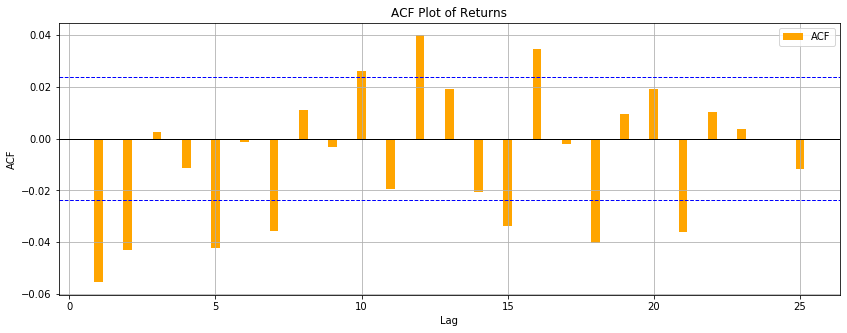

In [114]:
print("Auto-Correlation Function (ACF) for the daily returns of the SP 500")
plot_acf_custom(sp500_daily['daily_Return'], nlags=25)


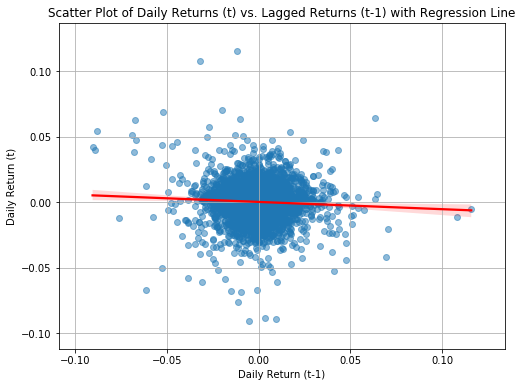

In [117]:
import seaborn as sns
# Create lagged returns (t-1)
sp500_daily['daily_Return_lag'] = sp500_daily['daily_Return'].shift(1)

# Drop NaN values created by lagging
sp500_daily = sp500_daily.dropna()

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=sp500_daily['daily_Return_lag'], y=sp500_daily['daily_Return'], 
            scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.xlabel('Daily Return (t-1)')
plt.ylabel('Daily Return (t)')
plt.title('Scatter Plot of Daily Returns (t) vs. Lagged Returns (t-1) with Regression Line')
plt.grid(True)
plt.show()

There are 6906 daily returns in the sample so that the confidence band in above figure is narrower around zero and several auto-correlations are significantly different from 0 (at 5% signficance level). Interestingly, the first order correlation is negative and significant suggesting that daily returns have a weak tendency to reverse the previous day change.

A `stylized fact` (This means it is a commonly observed pattern in data across different financial markets) is that daily returns are characterized by small auto-correlations, but large values of $\hat{\rho}_k$ when the returns are in absolute value or squared.

below figues shows the ACF for the absolute and squared daily returns up to lag 100 days:

Auto-Correlation Function (ACF) of absolute daily returns of the SP 500


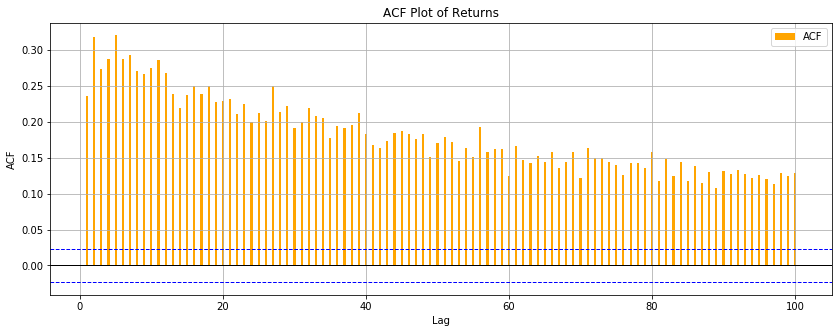

In [116]:
print("Auto-Correlation Function (ACF) of absolute daily returns of the SP 500")
plot_acf_custom(np.abs(sp500_daily['daily_Return']), nlags=100) 


Auto-Correlation Function (ACF) of square daily returns of the SP 500


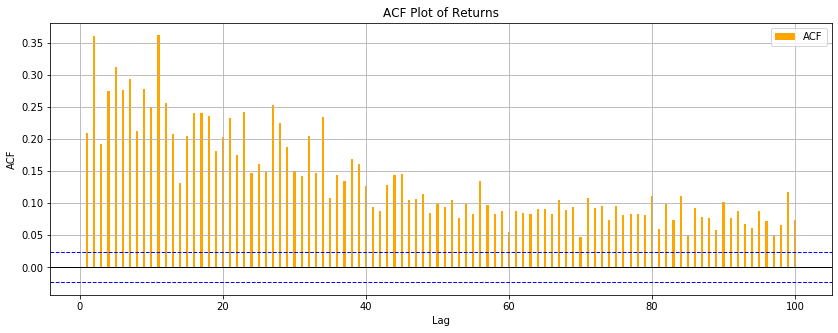

In [80]:
print("Auto-Correlation Function (ACF) of square daily returns of the SP 500")
plot_acf_custom((sp500_daily['daily_Return'])**2, nlags=100) 

These plots make clear that the absolute and square returns are significantly and positively correlated and that the auto-correlations decay very slowly as the lag increases. This shows that large (small) absolute returns are likely to be followed by large (small) absolute returns since the magnitude of the returns is auto-correlated rather than their direction. This pattern is consistent with the evidence that returns display volatility clusters that represent periods of high volatility that can last several months, followed by long periods of lower volatility. This suggests that volatility (in the sense of absolute or squared returns) is persistent and strongly predictable, while returns are weakly predictable. We will discuss this topic and volatility models in the next Chapter.

## 4.2 The Auto-Regressive (AR) Model

The evidence in the ACF indicates that lagged values of the returns or absolute/square returns might be informative about the future value of the variable itself and we would like to incorporate this information in a regression model. The **Auto-Regressive (AR) model** is a regression model in which the independent variables are lagged values of the dependent variable  $Y_t$ If we include only one lag of the dependent variable, we denote the model by `AR(1)` which is given by
$$
Y_t = \beta_0 + \beta_1 Y_{t-1} + \epsilon_t
$$

where $ \beta_0 $ and $ \beta_1 $ are coefficients to be estimated and $ \epsilon_t $ is an error term with mean zero and variance $ \sigma_{\epsilon}^2 $.

More generally, the `AR(p) ` model might include $ p $ lags of the dependent variable to account for the possibility that information relevant to predict $ Y_t $ is dispersed over several lags. The `AR(p)` model is given by

$$
Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \dots + \beta_p Y_{t-p} + \epsilon_t
$$

The properties of the AR(p) model are:

- $ E(Y_t | Y_{t-1}, \dots, Y_{t-p}) = \beta_0 + \beta_1 Y_{t-1} + \dots + \beta_p Y_{t-p} $ : the expected value of $  Y_t $  \textit{conditional} on the recent $  p $  realizations of the variable can be interpreted as a forecast since only past information is used to produce an expectation of the variable today.

-  $ E(Y_t) = \frac{\beta_0}{1 - (\beta_1 + \dots + \beta_p)} $: represents the \textit{unconditional} expectation or the long-run mean of $ Y_t $,

    $$
    E(Y_t) = \beta_0 + \beta_1 E(Y_{t-1}) + \dots + \beta_p E(Y_{t-p}) + E(\epsilon_t) 
    = \frac{\beta_0}{1 - \sum_{j=1}^{p} \beta_j}
    $$

    assuming that $E(Y_t) = E(Y_{t-k}) $ for all values of $k $. If the sum of the slopes $ \beta_i $, for $ i = 1, \dots, p $, is equal to one, the mean is not defined.

-  $Var(Y_t) = \frac{\sigma_{\epsilon}^2}{1 - (\beta_1^2 + \dots + \beta_p^2)} $, since

    $$
    Var(Y_t) = \beta_1^2 Var(Y_{t-1}) + \beta_2^2 Var(Y_{t-p}) + Var(\epsilon_t)
    $$

    $$
    = \left( \sum_{j=1}^{p} \beta_j^2 \right) Var(Y_t) + \sigma_{\epsilon}^2
    $$

    $$
    = \frac{\sigma_{\epsilon}^2}{1 - \sum_{j=1}^{p} \beta_j^2}
    $$

    where $ Var(Y_t) = Var(Y_{t-k}) $ for all values of $ k $.

- The sum of the slopes $ \beta_i $ is interpreted as a measure of **persistence** of the time series; persistence measures the extent that past values above/below the mean are likely to persist above/below the mean in the current period.  



The concept of persistence is also related to that of mean-reversion which measures the speed at which a time series reverts back to its long-run mean. The higher the persistence of a time series the longer it will take for deviations from the long-run mean to be absorbed. Persistence is associated with positive values of the sum of the betas, while negative values of the coefficients imply that the series fluctuates closely around the mean. This is because a value above the mean in the previous period is expected to be below the mean in the following period, and viceversa for negative values. In economics and finance we typically experience positive coefficients due to the persistent nature of economic shocks, although the daily returns considered above are a case of first-order negative auto-correlation.



### 4.2.1 Estimation

In Python, the Auto-Regressive (AR) model can be estimated using the Ordinary Least Squares (OLS) method as well as alternative estimation methods like Maximum Likelihood (ML). While both OLS and ML are consistent in large samples, they may yield slightly different results when estimating an AR model (for a more detailed discussion, see Tsay (2005)).

Python provides several functions and libraries for estimating time series models. Here are three commonly used approaches:

1. Using `statsmodels.OLS()`: This method applies Ordinary Least Squares (OLS) estimation.

2. Using `statsmodels.tsa.ar_select_order()` and `AutoReg()`:
 - `statsmodels.tsa.ar_select_order()` 
    - This function selects the optimal lag order for an Autoregressive (AR) model using criteria like AIC, BIC, or HQIC.
    - It does not estimate the AR model itself but rather helps determine the appropriate lag length.
 - `statsmodels.tsa.ar_model.AutoReg()`
   - This function fits an Autoregressive (AR) model to time series data.
   - By default, it uses Conditional Maximum Likelihood which is Ordinary Least Squares (OLS).
3. Using `statsmodels.tsa.arima.model.ARIMA()`: This function estimates AR, MA, and ARIMA models using ML.


    

#### Estimating a Time Series Model Using `statsmodels.OLS()`

Example: estimating a AR(1) model:
$$
Y_t = \beta_0 + \beta_1 Y_{t-1}  + \epsilon_t
$$

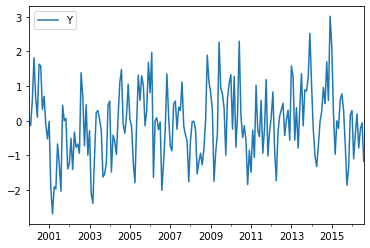

In [ ]:
import statsmodels.api as sm

# Simulate time series data
np.random.seed(42)
n = 200
time_index = pd.date_range(start="2000-01-01", periods=n, freq="M")

# Generate AR(1) process: Y_t = 0.5 * Y_{t-1} + ε_t
epsilon = np.random.randn(n)
Y = np.zeros(n)
for t in range(1, n):
    Y[t] = 0.5 * Y[t-1] + epsilon[t]

# Create DataFrame
df = pd.DataFrame({"Y": Y}, index=time_index)

df.plot()
plt.show

In [90]:
# Create lagged variable
df["Y_lag1"] = df["Y"].shift(1)

# Drop missing values due to lag
df = df.dropna()

# Define dependent and independent variables
X = df["Y_lag1"]
X = sm.add_constant(X)  # Add intercept
y = df["Y"]

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     45.73
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.51e-10
Time:                        18:14:58   Log-Likelihood:                -267.47
No. Observations:                 199   AIC:                             538.9
Df Residuals:                     197   BIC:                             545.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0483      0.066     -0.729      0.4

#### Estimating a Time Series Model Using `statsmodels.tsa.ar_model.AutoReg()`

Example: estimating a AR(3) model:
$$
Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 Y_{t-2}+ \beta_3 Y_{t-3} + \epsilon_t
$$

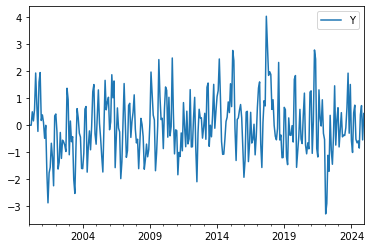

In [120]:
from statsmodels.tsa.ar_model import AutoReg

# Generate synthetic time series data (AR(3) process)
np.random.seed(42)
n = 300
Y = np.zeros(n)

for t in range(3, n):  # AR(3) process: Y_t = 0.6 Y_{t-1} - 0.3 Y_{t-2} + 0.2 Y_{t-3} + noise
    Y[t] = 0.6 * Y[t-1] - 0.3 * Y[t-2] + 0.2 * Y[t-3] + np.random.randn()

# Convert to Pandas Series with datetime index
time_index = pd.date_range(start="2000-01-01", periods=n, freq="M")
df = pd.DataFrame({"Y": Y}, index=time_index)
df.plot()
plt.show()

In [109]:
# Fit AR(3) model
model = AutoReg(df["Y"], lags=3).fit() 
# Print model summary
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      Y   No. Observations:                  300
Model:                     AutoReg(3)   Log Likelihood                -415.822
Method:               Conditional MLE   S.D. of innovations              0.981
Date:                Mon, 24 Feb 2025   AIC                            841.644
Time:                        18:49:08   BIC                            860.113
Sample:                    04-30-2000   HQIC                           849.038
                         - 12-31-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0137      0.057     -0.240      0.810      -0.125       0.098
Y.L1           0.5116      0.057      8.925      0.000       0.399       0.624
Y.L2          -0.2497      0.063     -3.962      0.0

In [110]:
# Forecast next 5 periods
forecast = model.predict(start=len(df), end=len(df) + 4)

# Convert to DataFrame for consistency
forecast_df = pd.DataFrame({"Forecasted_Y": forecast})
print(forecast_df)

            Forecasted_Y
2025-01-31      0.461637
2025-02-28      0.026154
2025-03-31     -0.045077
2025-04-30      0.031751
2025-05-31      0.018079


### 4.2.2 Lag selection

## 4.5 Trends in time series

## 4.6 Structural breaks in time series

## 4.7 Forecasting Revenue and Earnings-Per-Share (EPS)